# i. Perkenalan

---------------

- Milestones 2
- Nama  : Arvin Surya Wibowo
- Batch : HCK-028
- Objective : 

    Proyek ini dibuat untuk membuat model machine learning yang dapat memprediksi apakah customer berkemungkinan akan melakukan pembelian atau tidak. Proyek ini akan dibuat menggunakan algortima KNN, SVM, decision tree, random forest, dan XGBoost kemudian dievaluasi dengan metrics recall sebagai pertimbangan

---------------

## Problem Statement and Dataset Description

- Background :

    Salah satu tantangan utama yang dihadapi oleh e-commerce lojualguebeli.com adalah rendahnya konversi dari kunjungan pengguna menjadi transaksi pembelian. Meskipun situs mendapatkan banyak pengunjung setiap harinya, namun sebagian besar kunjungan tidak berakhir dengan pembelian. Oleh karena itu tim management lojualguebeli.com ingin mengembangkan model machine learning prediksi purchasing intention untuk memprediksi apakah seorang pengguna cenderung akan melakukan pembelian atau tidak sehingga pengguna yang diprediksi akan membeli akan diperlakukan secara berbeda dalam strategi pemasaran

- Analisa SMART

    - Spesifik :

        Menganalisis pola perilaku pengunjung website untuk memprediksi apakah mereka akan melakukan pembelian atau tidak

    - Measurable : 

        Meningkatkan conversion rate pembelian dari 1% ke 2.5 %
    
    - Achievable

        Melakukan analisis dan pengembangan model machine learning berbasis data historis pengunjung untuk mengenali pola pengunjung yang berpotensi melakukan pembelian

    - Relevant

        Perusahaan dapat mengidentifikasi pengunjung yang memiliki potensi membeli sehingga dapat difokuskan pada strategi pemasaran yang lebih terarah

    - Time-bound

        Mengembangkan model machine learning dilakukan selama 3 bulan oleh tim data analytics berdasarkan data perilaku pengunjung website

- Dataset yang digunakan adalah dataset yang berasal dari database suatu perusahaan e-commerce lojualguebeli.com. Dataset terdiri dari 10 data bertipe numerical dan 8 data bertipe categorical

    Sumber data berasal dari UC Irvine Machine Learning Repository

    Berikut adalah link datase: [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

- Problem statement:

    Meningkatkan conversion rate pembelian dari 1% ke 2.5 % dalam waktu 3 bulan, dengan cara mengembangkan model machine learning untuk mengetahui apakah seorang pengguna cenderung akan melakukan pembelian atau tidak sehingga pengguna yang diprediksi akan membeli akan diperlakukan secara berbeda dalam strategi pemasaran




Untuk informasi deksripsi dataset dapat dilihat seperti gambar dibawah ini

![Deskripsi dataset](tipe_data.png "Deskripsi dataset")

# ii. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

# iii. Data Loading

In [2]:
df = pd.read_csv('ecommerce_purchasing_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Mengecek ukuran dataset

In [3]:
print(f'Datase ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Datase ini memiliki 12330 baris dan 18 kolom


## Mengecek informasi dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Mengecek statistik sederhana dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


## Mengecek missing value

In [6]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada missing value, sehingga di feature engineering tidak perlu penanganan missing value

## Mengecek data duplikat

In [7]:
print(f' Terdapat {df.duplicated().sum()} data duplikat')

 Terdapat 125 data duplikat


# iv. Exploratory Data Analysis (EDA)

## 1. Bagaimana Tingkat Korelasi antara fitur dengan target ?

Kita akan mengecek korelasi data dengan target, yaitu kolom 'Revenue' yang bertipe data binary. Sehingga untuk melihat korelasi antara fitur numerical ke target akan dilakukan dengan pointbiserialr sedangkan antara fitur categorical ke target akan dilakukan dengan Chi-Squared

<!-- Sehingga, untuk mengetahui korelasi antara fitur numerical dengan target dan fitur categorical dengan target, maka akan dilakukan uji hipotesis dengan menghitung p-value untuk mengetahui signifikasi, lalu untuk mengetahui seberapa kuat korelasi akan diuji -->

Tujuan: Mengukur kekuatan hubungan antara setiap fitur dengan target Revenue untuk mengetahui fitur mana yang berpotensi informatif bagi model klasifikasi.

#### Korelasi fitur numerical terhadap target

Hipotesis:

H0 : Tidak ada korelasi antara variabel numerical dan target <br>
H1 : Terdapat korelasi antara variabel numerical dan target 

In [8]:
num_features = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay"
]

In [ ]:
hasil = []

for col in num_features:
    corr, p = pointbiserialr(df[col], df['Revenue'])
    hasil.append({
        'Fitur': col,
        'P-value': p,
        'Tingkat korelasi' : corr
    })

point_biserial = pd.DataFrame(hasil)
print(point_biserial)

                     Fitur        P-value  Tingkat signifikasi
0           Administrative   3.519760e-54             0.138917
1  Administrative_Duration   2.146514e-25             0.093587
2            Informational   3.174034e-26             0.095200
3   Informational_Duration   5.282871e-15             0.070345
4           ProductRelated   3.241187e-70             0.158538
5  ProductRelated_Duration   6.115338e-65             0.152373
6              BounceRates   1.594198e-63            -0.150673
7                ExitRates  1.662654e-119            -0.207071
8               PageValues   0.000000e+00             0.492569
9               SpecialDay   5.498934e-20            -0.082305


C:\Users\hayka\AppData\Local\Temp\ipykernel_3664\2568123801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


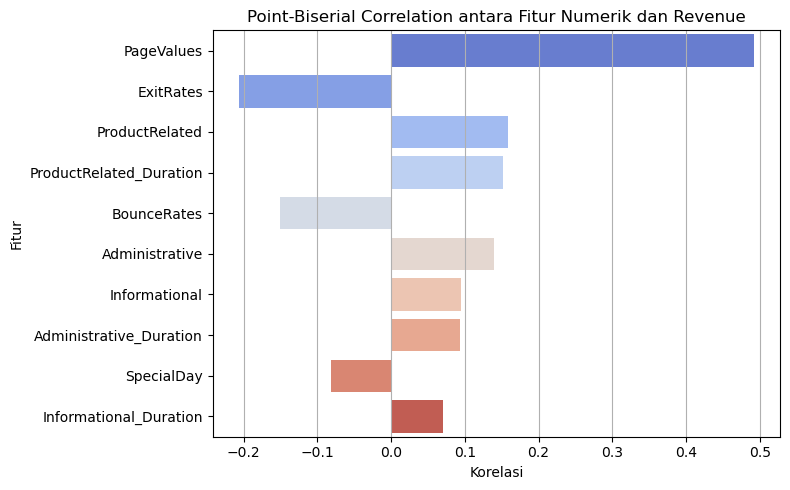

In [ ]:
point_biserial_sorted = point_biserial.sort_values(by='Tingkat korelasi', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=point_biserial_sorted,
    x='Tingkat korelasi',
    y='Fitur',
    palette='coolwarm'
)
plt.title('Point-Biserial Correlation antara Fitur Numerik dan Revenue')
plt.xlabel('Korelasi')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Hasilnya H1 diterima, dimana semua fitur numerical memiliki p-value < 0.05, namun fitur-fitur ini tidak ada yang memiliki tingkat signifikasi lebih dari 0.5, sehingga nantinya perlu dilakukan feature engineering untuk menghasilkan fitur-fitur baru yang lebih informatif

### Korelasi fitur categorical terhadap target

Hipotesis:

H0 : Tidak ada korelasi antara variabel categorical dan target <br>
H1 : Terdapat korelasi antara variabel categorical dan target 

In [11]:
cat_features = [
    'Month',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
    'VisitorType',
    'Weekend'
]

In [12]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

hasil = []

for col in cat_features:
    contingency = pd.crosstab(df[col], df['Revenue'])

    chi2, p, dof, _ = chi2_contingency(contingency)
    cramers = cramers_v(contingency)

    hasil.append({
        'Fitur': col,
        'P-value': p,
        "Cramér's V": cramers
    })

chi_square_df = pd.DataFrame(hasil)
print(chi_square_df)

              Fitur       P-value  Cramér's V
0             Month  2.238786e-77    0.176690
1  OperatingSystems  1.416094e-13    0.078006
2           Browser  6.087543e-03    0.047411
3            Region  3.214250e-01    0.027394
4       TrafficType  1.652735e-67    0.173963
5       VisitorType  4.269904e-30    0.104735
6           Weekend  1.266325e-03    0.029030


C:\Users\hayka\AppData\Local\Temp\ipykernel_3664\2157096169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


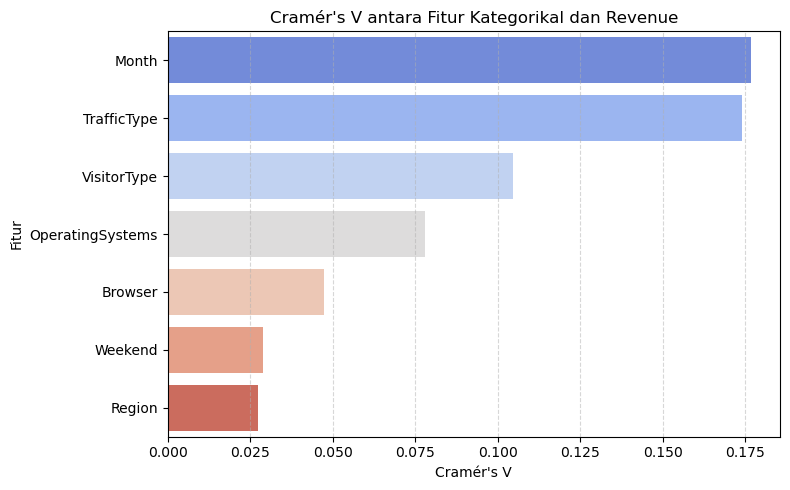

In [13]:
sorted_cramer = chi_square_df.sort_values(by="Cramér's V", key=abs, ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=sorted_cramer,
    x="Cramér's V",
    y="Fitur",
    palette='coolwarm'      
)

plt.title("Cramér's V antara Fitur Kategorikal dan Revenue")
plt.xlabel("Cramér's V")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Hasilnya terdapat 1 kolom yang H1 nya ditolak, yaitu kolom Region yang memiliki p-value 0.321425. Sedangkan kolom yang lain memiliki P-value < 0.05 sehingga H1 diterima. Tingkat korelasi yang diuji menggunakan Cramér's V juga sangat rendah, sehingga perlu adanya fitur baru yang memiliki korelasi yang besar

## 2. Bagaimana persebaran data PageValues antara target positif dan negatif ?

Seperti yang telah diketahui pada analisis sebelumnya, fitur PageValues menunjukkan signifikasi tertinggi terhadap target Revenue di antara seluruh fitur terutama fitur numerik yang dianalisis.

Oleh karena itu, pada tahap ini kita ingin menyelidiki lebih lanjut bagaimana distribusi nilai PageValues pada dua kelompok target yaitu antara pengguna yang melakukan pembelian (Revenue = True) dan yang tidak (Revenue = False)

Tujuan: Memahami bagaimana nilai PageValues terdistribusi dalam kedua kelompok tersebut, serta untuk melihat apakah terdapat pola khas atau perbedaan yang cukup mencolok antara keduanya

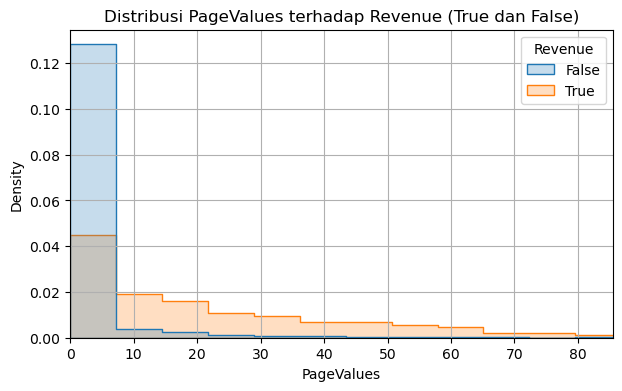

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='PageValues', hue='Revenue', bins=50, element='step', stat='density', common_norm=False)
plt.title('Distribusi PageValues terhadap Revenue (True dan False)')
plt.xlabel('PageValues')
plt.ylabel('Density')
plt.xlim(0, df['PageValues'].quantile(0.99))  
plt.grid(True)
plt.show()

PageValues adalah fitur yang berasal dari Google Analytics. Nilai ini menunjukkan berapa besar kontribusi rata-rata suatu halaman terhadap transaksi. Semakin tinggi nilai PageValues, artinya halaman tersebut lebih sering dikunjungi dalam sesi yang menghasilkan pembelian. Jadi, fitur ini mencerminkan seberapa bernilai halaman-halaman yang dikunjungi oleh pengguna

Berdasarkan hasil visualisasi distribusi PageValues, terlihat bahwa sebagian besar sesi (baik yang menghasilkan pembelian atau tidak) memiliki nilai PageValues yang sangat rendah. Artinya, mayoritas pengguna hanya mengunjungi halaman-halaman yang tidak terlalu berkaitan dengan transaksi. Namun, ketika kita lihat sesi dengan Revenue = True (pengguna yang membeli), distribusinya lebih menyebar ke nilai PageValues yang lebih tinggi. Ini menunjukkan bahwa pengguna yang akhirnya melakukan pembelian cenderung menjelajahi halaman-halaman yang lebih penting secara bisnis

Sehingga, semakin tinggi nilai PageValues dalam sebuah sesi, semakin besar kemungkinan sesi tersebut berujung pada pembelian

## 3. Apa Jenis Halaman yang Paling Berkontribusi terhadap Nilai PageValues ?

Setelah kita mengetahui bahwa PageValues memiliki korelasi tertinggi terhadap Revenue, dan melihat perbedaan distribusinya antara pengguna yang membeli dan tidak, pertanyaan selanjutnya adalah:

Bagian mana dari page (administratif, informasional, atau produk) yang paling berperan dalam menghasilkan nilai halaman tinggi (PageValues)?

Untuk menjawab ini, kita perlu menggabungkan dua hal:<br>
- Jumlah halaman yang dikunjungi (ex: Administrative)<br>
- Total waktu yang dihabiskan di jenis halaman tersebut (ex: Administrative_Duration)

Dengan menggabungkan keduanya, kita bisa menghitung seberapa intens interaksi pengguna pada tiap jenis halaman. Nilai-nilai ini kemudian bisa dibandingkan terhadap PageValues untuk melihat halaman mana yang paling mendorong potensi konversi.

Tujuan: Hasil analisis ini akan membantu kita memahami jenis halaman apa yang paling berdampak terhadap keputusan pembelian pengguna, sehingga bisa menjadi dasar penting dalam pengambilan keputusan strategi halaman

In [15]:
# Salin data ke variabel eda3
eda3 = df.copy()

In [16]:
# Hitung waktu rata-rata per halaman
eda3['Admin_AvgTime']    = eda3['Administrative_Duration'] / (eda3['Administrative'] + 1)
eda3['Info_AvgTime']     = eda3['Informational_Duration']  / (eda3['Informational'] + 1)
eda3['Product_AvgTime']  = eda3['ProductRelated_Duration'] / (eda3['ProductRelated'] + 1)

In [17]:
# Hitung engagement score (jumlah halaman + durasi)
eda3['Admin_Engagement']    = eda3['Administrative'] + eda3['Administrative_Duration']
eda3['Info_Engagement']     = eda3['Informational'] + eda3['Informational_Duration']
eda3['Product_Engagement']  = eda3['ProductRelated'] + eda3['ProductRelated_Duration']

In [18]:
# Identifikasi jenis halaman dominan per sesi
def dominant_section(row):
    sections = {
        'Administrative': row['Admin_Engagement'],
        'Informational': row['Info_Engagement'],
        'ProductRelated': row['Product_Engagement']
    }
    return max(sections, key=sections.get)

eda3['DominantSection'] = eda3.apply(dominant_section, axis=1)

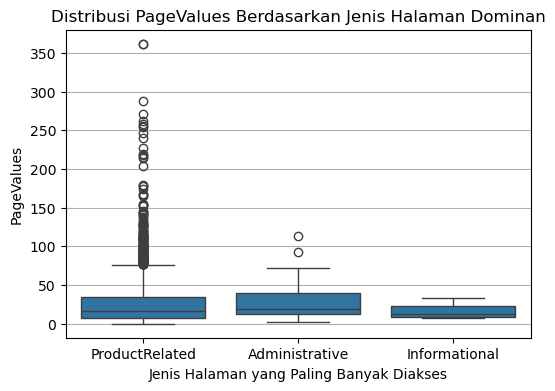

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=eda3[eda3['PageValues'] > 0], x='DominantSection', y='PageValues')
plt.title('Distribusi PageValues Berdasarkan Jenis Halaman Dominan')
plt.xlabel('Jenis Halaman yang Paling Banyak Diakses')
plt.ylabel('PageValues')
plt.grid(True, axis='y')
plt.show()

Hasil visualisasi menunjukkan bahwa sesi dengan halaman produk (ProductRelated) memiliki persebaran PageValues yang paling luas, serta mengandung banyak nilai outlier yang tinggi. Artinya, pengguna yang paling banyak mengakses halaman produk cenderung berpotensi lebih besar melakukan pembelian

Sementara itu, sesi yang didominasi halaman administratif (Administrative) juga menunjukkan persebaran yang cukup tinggi, tetapi tidak sebanyak halaman produk. Di sisi lain, sesi yang paling banyak berinteraksi dengan halaman informasi (Informational) memiliki distribusi PageValues yang relatif rendah dan lebih terkonsentrasi di nilai-nilai kecil

Sehingga halaman produk adalah halaman yang paling krusial dalam mendorong pengguna menuju pembelian, dibandingkan dua jenis halaman lainnya

## 4. Kapan Konversi Pembelian Paling Banyak Terjadi Berdasarkan Bulan?

Salah satu faktor penting dalam perilaku pengguna e-commerce adalah waktu kunjungan, khususnya bulan. Pola musiman seperti bulan promosi, akhir tahun, acara keagamaan, dll sering kali memengaruhi perilaku pembelian pengguna. Oleh karena itu, memahami bulan-bulan apa saja yang memiliki tingkat konversi tinggi dapat membantu dalam merancang strategi pemasaran

Tujuan: Mengetahui di bulan apa pengguna paling sering melakukan pembelian (Revenue = True). Analisis ini berguna untuk memahami pola musiman dan waktu-waktu strategis di mana konversi cenderung meningkat

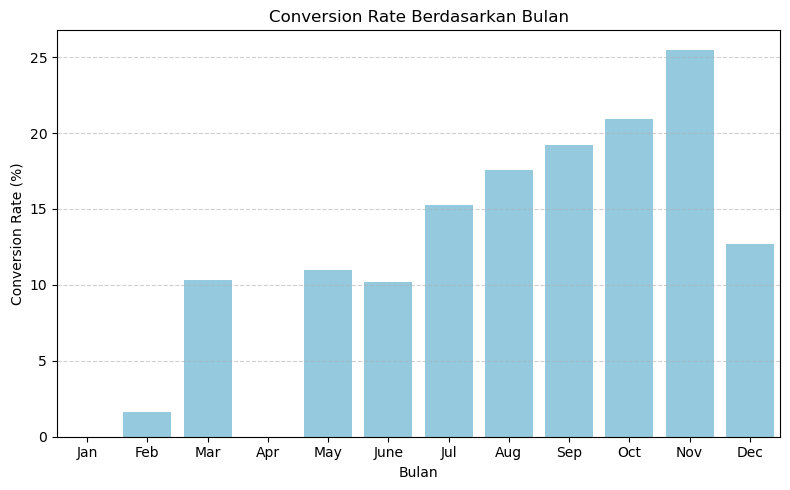

In [81]:
month_revenue = (
    df.groupby('Month')['Revenue']
    .value_counts(normalize=True)
    .mul(100)  
    .rename('Percentage')
    .reset_index()
)

month_revenue_true = month_revenue[month_revenue['Revenue'] == True]

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=month_revenue_true,
    x='Month',
    y='Percentage',  
    order=month_order,
    color='skyblue'
)

plt.title('Conversion Rate Berdasarkan Bulan')
plt.ylabel('Conversion Rate (%)')  
plt.xlabel('Bulan')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Dari grafik yang ditampilkan, terlihat bahwa persentase pembelian meningkat secara konsisten dari bulan mei hingga mencapai puncaknya di bulan November, dengan angka di lebih dari 25%. Sebaliknya, bulan Januari hingga April mencatatkan persentase pembelian yang sangat rendah

Pola ini mengindikasikan adanya perilaku musiman di mana pengguna lebih aktif melakukan pembelian menjelang akhir tahun. kemungkinan karena promosi seperti natal dan liburan akhir tahun

## 5. Apakah Pembelian Lebih Sering Terjadi di Akhir Pekan pada Bulan-bulan Tertentu?

Setelah kita melihat bahwa pembelian meningkat tajam pada bulan-bulan akhir tahun seperti Oktober dan November, pertanyaan lanjutan yang muncul adalah:

Apakah pembelian tersebut lebih banyak terjadi saat akhir pekan (Weekend = True) dibanding hari biasa?

Oleh karena itu, kita akan melihat top 5 convertion rate berdasarkan bulan dan status weekend dengan persentase pembelian tertinggi

Tujuan: Mengidentifikasi kombinasi bulan dan status akhir pekan yang memiliki tingkat konversi tertinggi

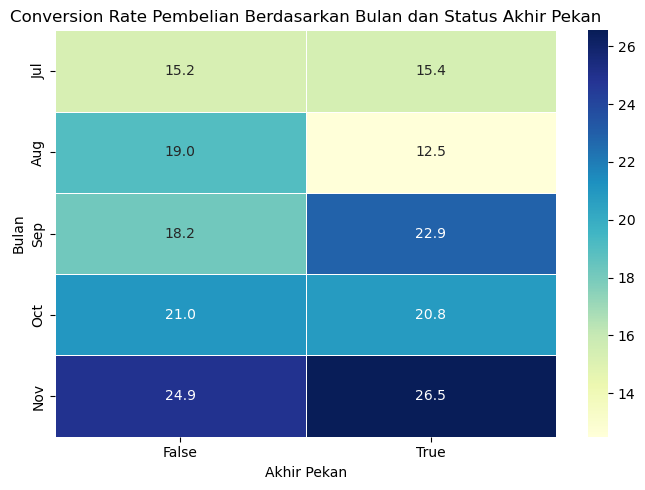

In [21]:
pivot = (
    df.groupby(['Month', 'Weekend'])['Revenue']
    .mean()  
    .mul(100)
    .reset_index()
    .pivot(index='Month', columns='Weekend', values='Revenue')
)

# Top 5 convertion rate berdaasrkan bulan
month_order = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov']
pivot = pivot.reindex(month_order)

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Conversion Rate Pembelian Berdasarkan Bulan dan Status Akhir Pekan")
plt.xlabel("Akhir Pekan")
plt.ylabel("Bulan")
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi heatmap, pada bulan juli paling sering terjadi transaksi pada weekend, bulan agustus paling sering terjadi transaksi pada weekday, bulan september paling sering terjadi transaksi pada weekend, bulan oktober paling sering terjadi transaksi pada weekday, bulan november paling sering terjadi transaksi pada weekend, dan bulan juli paling sering terjadi transaksi pada weekend

Sehingga tidak selalu di akhir pekan pembelian sering terjadi

## 6. Bagaimana persentase pembelian berdasarkan tipe pengunjung ?

Setelah menganalisis waktu kunjungan, kita kini ingin mengetahui bagaimana persentase pembelian berdasarkan tipe pengunjung (VisitorType). Fitur VisitorType mengelompokkan pengunjung menjadi 3 kategori yaitu, New_Visitor, Returning_Visitor, dan Other

Tujuan: Mengevaluasi perbedaan persentase pembelian antara pengunjung baru, pengunjung lama yang kembali, dan lainnya berguna untuk mendukung strategi retensi atau mencari pengguna baru

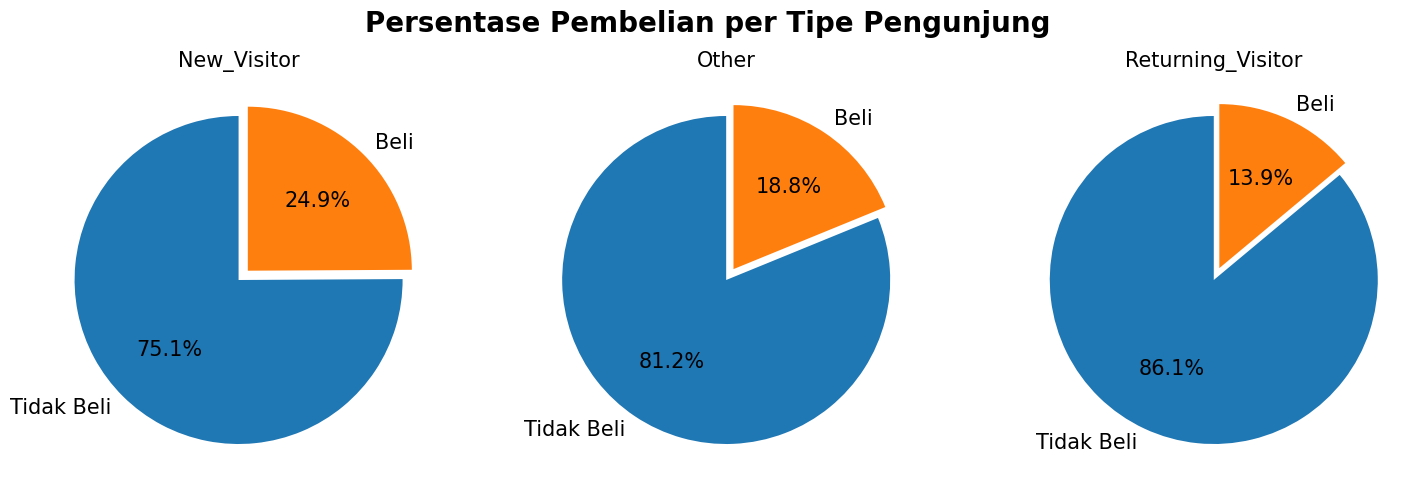

In [22]:
visitor_types = ['New_Visitor', 'Other', 'Returning_Visitor']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, vtype in enumerate(visitor_types):
    subset = df[df['VisitorType'] == vtype]
    counts = subset['Revenue'].value_counts(normalize=True) * 100
    sizes = [counts.get(False, 0), counts.get(True, 0)]
    labels = ['Tidak Beli', 'Beli']

    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        explode=[0, 0.08] ,
        startangle=90,
        textprops={'fontsize': 15}
    )
    axes[i].set_title(f'{vtype}', fontsize=15)

plt.suptitle('Persentase Pembelian per Tipe Pengunjung', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Berdasarkan grafik, terlihat bahwa pengunjung baru justru memiliki tingkat persentase pembelian tertinggi, yaitu sekitar 25%. Ini merupakan penemuan unik, karena secara umum dalam e-commerce, pengunjung lama dianggap lebih bernilai

Sementara itu, tipe Other menempati posisi tengah dengan tingkat persentase pembelian sekitar 19%, dan Returning_Visitor justru memiliki tingkat persentase pembelian terendah, yaitu hanya sekitar 14%. Hal ini bisa mengindikasikan bahwa pengguna yang kembali tidak langsung melakukan pembelian

## 7. Bagaimana Pola Pembelian Pengunjung Baru Sepanjang Tahun ?

Setelah sebelumnya ditemukan bahwa pengunjung baru memiliki tingkat konversi tertinggi dibandingkan tipe pengunjung lainnya, muncul pertanyaan lanjutan

Kapan bulan terbaik untuk mendorong pembelian dari pengunjung baru lebih banyak lagi?

Sehingga analisis ini difokuskan pada pola pembelian pengunjung baru berdasarkan bulan. Dengan memahami kapan mereka paling aktif melakukan transaksi, kita dapat merancang strategi promosi yang terarah 

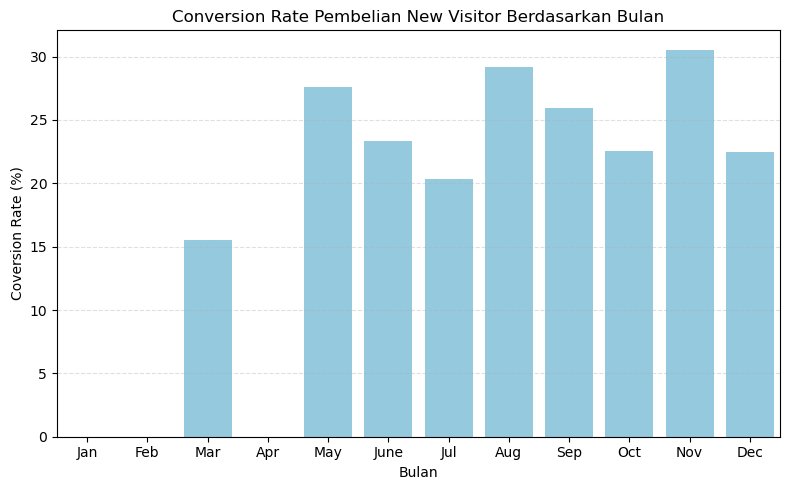

In [80]:
new_visitor = df[df['VisitorType'] == 'New_Visitor']

new_visitor_month = (
    new_visitor.groupby('Month')['Revenue']
    .mean()  
    .mul(100)  
    .reset_index()
    .rename(columns={'Revenue': 'Persentase_Pembelian'})
)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
new_visitor_month['Month'] = pd.Categorical(new_visitor_month['Month'], categories=month_order, ordered=True)
new_visitor_month = new_visitor_month.sort_values('Month')

plt.figure(figsize=(8,5))
sns.barplot(data=new_visitor_month, x='Month', y='Persentase_Pembelian', color='skyblue')
plt.title('Conversion Rate Pembelian New Visitor Berdasarkan Bulan')
plt.ylabel('Coversion Rate (%)')
plt.xlabel('Bulan')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Berdasarkan grafik, terlihat adanya pola peningkatan bertahap dalam convertion rate pelanggan baru sepanjang tahun. Pembelian mulai meningkat secara signifikan sejak bulan maret, namun tidak ada transaksi pada bulan april, lalu menanjak lagi dari bulan mei hingga mencapai puncaknya pada bulan December. Setelah itu, terjadi penurunan kembali pada bulan Januari

# v. Feature Engineering

## Handling Cardinality

In [24]:
# Mencari cardinality 
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cat_features:
    listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai kolom', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai kolom,nilai unique
0,Month,10,"[Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep, Dec]"
1,OperatingSystems,8,"[1, 2, 4, 3, 7, 6, 8, 5]"
2,Browser,13,"[1, 2, 3, 4, 5, 6, 7, 10, 8, 9, 12, 13, 11]"
3,Region,9,"[1, 9, 2, 3, 4, 5, 6, 7, 8]"
4,TrafficType,20,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 16, 17, 20]"
5,VisitorType,3,"[Returning_Visitor, New_Visitor, Other]"
6,Weekend,2,"[False, True]"


Karena semua kolom categorical memiliki low cardinality, sehingga tidak perlu handling cardinality

## Penanganan data duplikat

Data duplikat akan di hapus karena dapat menyebabkan analisa yang bias dan mengganggu akurasi model

In [25]:
print(f'Data memiliki {df.duplicated().sum()} yang akan dihapus')

Data memiliki 125 yang akan dihapus


In [26]:
df = df.drop_duplicates()
print(f'Data memiliki {df.duplicated().sum()} data duplikat')

Data memiliki 0 data duplikat


## Menambah features

Seperti yang diketahui saat mengecek korelasi data, hampir seluruh fitur memiliki korelasi yanng lemah terhadap target, sehingga perlu dilakukan penambahan fitur

Penambahan fitur akan dilakukan didalam pipeline, Tujuannya adalah agar proses feature engineering ini dapat diotomatisasi dan dimasukkan ke dalam pipeline, sehingga saat inference model hanya membutuhkan input data awal dan sistem akan secara otomatis menambahkan fitur baru seperti yang dilakukan saat pelatihan model

In [27]:
tambah = df.copy()
tambah.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Total Pages

Total pages adalah  jumlah keseluruhan halaman yang dikunjungi dalam satu sesi, yaitu penjumlahan Administrative, Informational, dan ProductRelated

In [28]:
tambah['total_pages'] = tambah['Administrative'] + tambah['Informational'] + tambah['ProductRelated']
tambah.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,10


### Total Duration

Total duration adalah jumlah keseluruhan waktu yang dihabiskan pengguna dalam satu sesi, dihitung sebagai penjumlahan Administrative duration + Informational duration + Product related duration

In [29]:
tambah['total_duration'] = tambah['Administrative_Duration'] + tambah['Informational_Duration'] + tambah['ProductRelated_Duration']
tambah.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2,64.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2,2.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,10,627.500000


### Engagement score page

Engagement score page adalah indikator keterlibatan pengguna berdasarkan banyaknya halaman yang dikunjungi dan page values (nilai ekonomis halaman) tersebut

Dimana page values adalah metrik dalam Google Analytics yang menunjukkan rata-rata nilai ekonomi yang dikaitkan dengan kunjungan ke suatu halaman web

In [30]:
tambah['engagement_score_pages'] = tambah['PageValues'] * tambah['total_pages']
tambah.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration,engagement_score_pages
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,1,0.000000,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2,64.000000,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,1,0.000000,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2,2.666667,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,10,627.500000,0.0


### Engagement score duration

Total duration indikator nilai interaksi pengguna dengan situs berdasarkan lamanya sesi dan nilai dari halaman yang dikunjungi

In [31]:
tambah['engagement_score_duration'] = tambah['PageValues'] * tambah['total_duration']
tambah.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration,engagement_score_pages,engagement_score_duration
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,Returning_Visitor,False,False,1,0.000000,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,1,2,Returning_Visitor,False,False,2,64.000000,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,9,3,Returning_Visitor,False,False,1,0.000000,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,2,2,4,Returning_Visitor,False,False,2,2.666667,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,1,4,Returning_Visitor,True,False,10,627.500000,0.0,0.0


Setelah menambahkan beberapa fitur baru, lakukan kembali uji korelasi untuk melihat hubungan antara fitur-fitur tersebut dengan target

In [32]:
num_features = [col for col in tambah.columns if col not in cat_features]
num_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Revenue',
 'total_pages',
 'total_duration',
 'engagement_score_pages',
 'engagement_score_duration']

In [33]:
tambah.shape

(12205, 22)

In [34]:
hasil = []

for col in num_features:
    corr, p = pointbiserialr(tambah[col], tambah['Revenue'])
    hasil.append({
        'Fitur': col,
        'P-value': p,
        'Tingkat korelasi' : corr
    })

point_biserial = pd.DataFrame(hasil)
print(point_biserial)

                        Fitur        P-value  Tingkat korelasi
0              Administrative   1.021348e-51          0.136330
1     Administrative_Duration   3.036186e-24          0.091768
2               Informational   3.571244e-25          0.093626
3      Informational_Duration   1.709107e-14          0.069358
4              ProductRelated   2.208253e-67          0.156042
5     ProductRelated_Duration   2.068567e-62          0.150077
6                 BounceRates   2.074007e-58         -0.145091
7                   ExitRates  3.545490e-115         -0.204320
8                  PageValues   0.000000e+00          0.491894
9                  SpecialDay   2.219964e-20         -0.083601
10                    Revenue   0.000000e+00          1.000000
11                total_pages   3.862815e-72          0.161535
12             total_duration   2.009069e-65          0.153720
13     engagement_score_pages  3.327736e-282          0.316575
14  engagement_score_duration   0.000000e+00          0

Hasilnya, fitur baru yang ditambahkan seperti total_pages, total_duration, engagement_score_pages, dan engagement_score_duration menunjukkan tingkat korelasi yang masih rendah terhadap target Revenue. Namun, fitur-fitur ini tetap dapat berkontribusi dalam menangkap pola yang lebih kompleks pada model, meskipun tidak menunjukkan korelasi yang kuat secara langsung

## Split fitur dan target

In [35]:
# Membagi fitur sebagai variabel X dan target sebagai variabel y
X = df.drop(columns='Revenue')
y = df['Revenue']

In [36]:
# Hasil dataset X
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [37]:
# Hasil variabel y
y.describe()

count     12205
unique        2
top       False
freq      10297
Name: Revenue, dtype: object

## Split train set dan test set

Karena target merupakan data imbalance, sehingga perlu melakukan stratify

In [38]:
# Melakukan split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (9764, 17)
Test Size (2441, 17)


In [39]:
y_train.value_counts(normalize=True)

Revenue
False    0.843712
True     0.156288
Name: proportion, dtype: float64

## Penanganan data outlier

Data outlier akan dicari pada fitur numerical

In [40]:
num_features = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay"
]


In [41]:
# Mencari distribusi data 
listItem= []

for col in num_features:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal','skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Administrative,1.9,skewed
1,Administrative_Duration,5.7,skewed
2,Informational,4.1,skewed
3,Informational_Duration,7.3,skewed
4,ProductRelated,4.1,skewed
5,ProductRelated_Duration,7.7,skewed
6,BounceRates,3.2,skewed
7,ExitRates,2.2,skewed
8,PageValues,6.4,skewed
9,SpecialDay,3.3,skewed


Terlihat bahwa semua data terdistribusi skewed, selanjutnya kita lihat persentase outliernya

In [42]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Administrative,16.00,-12.00,0.34
1,Administrative_Duration,376.00,-282.00,4.29
2,Informational,0.00,0.00,21.75
3,Informational_Duration,0.00,0.00,19.90
4,ProductRelated,128.00,-82.00,3.69
5,ProductRelated_Duration,5365.08,-3684.22,3.33
6,BounceRates,0.07,-0.05,7.59
7,ExitRates,0.15,-0.09,5.42
8,PageValues,0.00,0.00,22.50
9,SpecialDay,0.00,0.00,10.25


Walaupun dataset ini memiliki banyak kolom dengan persentase outlier > 5%, namun dataset ini merupakan data asli yang dikumpulkan langsung oleh pemilik data. Oleh karena itu, meskipun terdapat nilai-nilai yang terdeteksi sebagai outlier, data tersebut tetap dipertahankan karena merepresentasikan kondisi nyata di lapangan 

## Transformasi data

Pertama akan dibuatkan fungsi add_custom_features untuk menghasilkan fitur-fitur baru dari kombinasi beberapa kolom yang sudah tersedia dalam data

In [43]:
def add_custom_features(df):
    add = df.copy()
    
    add['total_pages'] = (
        add['Administrative'] +
        add['Informational'] +
        add['ProductRelated']
    )

    add['total_duration'] = (
        add['Administrative_Duration'] +
        add['Informational_Duration'] +
        add['ProductRelated_Duration']
    )

    add['engagement_score_pages'] = (
        add['PageValues'] +
        add['total_pages']
    )

    add['engagement_score_duration'] = (
        add['PageValues'] +
        add['total_duration']
    )
    
    return add

Fungsi add_custom_features dimasukkan ke dalam pipeline dengan cara dibungkus menggunakan FunctionTransformer, lalu disimpan dalam variabel add_features

In [44]:
add_features = FunctionTransformer(add_custom_features)

In [45]:
print('kolom numeric :', num_features)

kolom numeric : ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


In [46]:
print('kolom categorical :', cat_features)

kolom categorical : ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


Data numerical akan  diimputasi menggunakan KNNImputer karena metode ini mempertimbangkan kesamaan antar sampel dalam ruang fitur. Sehingga akan mempertahankan struktur data yang lebih representatif. Selain itu data numerical akan di scaling menggunakan RobustScaler karena distribusi data numerical skewed

In [47]:
num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])
num_pipeline

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', RobustScaler())])

Data categorical akan diimputasi dengan SimpleImputer menggunakan strategi most_frequent karena metode ini secara efektif menggantikan nilai yang hilang dengan kategori yang paling sering muncul dalam kolom tersebut. Selain itu data akan di encoding dengan one hot encoder karena semua data bersifat nominal

In [48]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [49]:
preprocessor = ColumnTransformer([
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)
])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Administrative', 'Administrative_Duration',
                                  'Informational', 'Informational_Duration',
                                  'ProductRelated', 'ProductRelated_Duration',
                                  'BounceRates', 'ExitRates', 'PageValues',
                                  'SpecialDay']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Month', 'OperatingSystems', 'Browser',
                                  'Region', 'TrafficType', 'VisitorType',
                                  'Weekend'])])

# vi. Model Definition

Algoritma yang dipilih adalah KNN, SVM, Decision Tree, Random Forest, dan XGBoost karena masing-masing memiliki karakteristik yang berbeda dan dapat memberikan perspektif yang beragam dalam menyelesaikan masalah klasifikasi. Berikut adalah alasan kenapa memakai algortima tersebut

1. KNN
    - Mudah diimplementasikan dan diinterpretasikan
    - Tidak memerlukan pelatihan eksplisit

2. SVM
    - Efektif untuk data berdimensi tinggi
    - Mampu menangani kasus non-linear

3. Decision Tree
    - Interpretatif dan mudah divisualisasikan
    - Cepat untuk pelatihan dan inferensi

4. Random Forest
    - Lebih stabil dan akurat dibandingkan decision tree
    - Tahan terhadap overfitting

5. XGBoost
    - Mendukung regularisasi untuk mengontrol overfitting
    - Dapat menangani missing values dan interaksi fitur kompleks secara otomatis

Karena tujuan dari model ini adalah membantu tim marketing dalam memprediksi apakah customer berkemungkinan akan melakukan pembelian atau tidak. Oleh karena itu, model perlu meminimalkan kesalahan prediksi di mana pelanggan diperkirakan tidak akan membeli, padahal sebenarnya melakukan pembelian (false negative), agar jangkauan terhadap pelanggan potensial menjadi lebih optimal

Sehingga metric yang perlu diperhatikan adalah recall kelas 1 (membeli)

# vii. Model Training - Bagian I

Pada model training - bagian I akan dilakukan training dengan parameter default dan cross_val_score. Sehingga model yang terbaik akan dilakukan training menggunakan hyperparameter tuning di model training - bagian II

### KNN

In [50]:
knn = Pipeline([
    ('add_features', add_features),
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])
knn.fit(X_train, y_train)

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_custom_features at 0x000002AB9F9E1F70>)),
                ('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('algo', KNeighborsClassifier())])

### SVM

In [51]:
svm = Pipeline([
    ('add_features', add_features),
    ('prep', preprocessor),
    ('algo', SVC(probability=True, random_state=42))
])
svm.fit(X_train, y_train)

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_custom_features at 0x000002AB9F9E1F70>)),
                ('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('algo', SVC(probability=True, random_state=42))])

### Decision Tree

In [52]:
dt = Pipeline([
    ('add_features', add_features),
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier(random_state=42))
])
dt.fit(X_train, y_train)

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_custom_features at 0x000002AB9F9E1F70>)),
                ('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('algo', DecisionTreeClassifier(random_state=42))])

### Random Forest

In [53]:
rf = Pipeline([
    ('add_features', add_features),
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42))
])
rf.fit(X_train, y_train)

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_custom_features at 0x000002AB9F9E1F70>)),
                ('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('algo', RandomForestClassifier(random_state=42))])

### XGBoost

In [54]:
xgb = Pipeline([
    ('add_features', add_features),
    ('prep', preprocessor),
    ('algo', XGBClassifier(random_state=42))
])
xgb.fit(X_train, y_train)

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_custom_features at 0x000002AB9F9E1F70>)),
                ('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_D...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

# viii. Model Evaluation - Bagian I

## KNN

In [55]:
recall_cross_val_pipe = cross_val_score(knn, 
                                    X_train,
                                    y_train,
                                    scoring="recall") 

print('Recall Score - All - Cross Validation  : ', recall_cross_val_pipe)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val_pipe.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val_pipe.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val_pipe.mean()-recall_cross_val_pipe.std()) , '-', (recall_cross_val_pipe.mean()+recall_cross_val_pipe.std()))

Recall Score - All - Cross Validation  :  [0.46229508 0.5147541  0.53114754 0.50653595 0.52786885]
Recall Score - Mean - Cross Validation :  0.508520304296582
Recall Score - Std - Cross Validation  :  0.024762581428319008
Recall Score - Range of Test-Set       :  0.483757722868263 - 0.533282885724901


Berdasarkan hasil evaluasi menggunakan metrik recall pada proses cross-validation, didapatkan nilai rata-rata recall sebesar 0.508. Meskipun belum tergolong tinggi, nilai ini sudah menunjukkan bahwa model memiliki sensitivitas yang standar dalam mengidentifikasi pengunjung yang melakukan pembelian.

Nilai standar deviasi recall sebesar 0.025 mengindikasikan bahwa performa model cukup konsisten di seluruh fold data. 



In [56]:
# Check performance model

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      8238
        True       0.78      0.63      0.70      1526

    accuracy                           0.91      9764
   macro avg       0.86      0.80      0.82      9764
weighted avg       0.91      0.91      0.91      9764


Test
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2059
        True       0.69      0.54      0.60       382

    accuracy                           0.89      2441
   macro avg       0.80      0.75      0.77      2441
weighted avg       0.88      0.89      0.88      2441



Model ini menunjukkan recall sebesar 63% pada data train. Namun, pada data test, recall menurun menjadi 54%. Penurunan ini mengindikasikan adanya **overfit**

## SVM

In [57]:
recall_cross_val_pipe = cross_val_score(svm, 
                                    X_train,
                                    y_train,
                                    scoring="recall") # type: ignore

print('Recall Score - All - Cross Validation  : ', recall_cross_val_pipe)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val_pipe.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val_pipe.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val_pipe.mean()-recall_cross_val_pipe.std()) , '-', (recall_cross_val_pipe.mean()+recall_cross_val_pipe.std()))

Recall Score - All - Cross Validation  :  [0.43934426 0.44590164 0.45245902 0.40522876 0.47213115]
Recall Score - Mean - Cross Validation :  0.443012964748741
Recall Score - Std - Cross Validation  :  0.021847409668878513
Recall Score - Range of Test-Set       :  0.42116555507986253 - 0.4648603744176195


Berdasarkan hasil evaluasi menggunakan metrik recall pada proses cross-validation, didapatkan nilai rata-rata recall sebesar 0.443. Nilai tergolong rendah, yang berarti model belum mampu mengenali sebagian besar pengunjung yang benar-benar melakukan pembelian

Nilai standar deviasi recall sebesar 0.021 mengindikasikan bahwa performa model cukup konsisten di seluruh fold data. 



In [58]:
# Check performance model

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      8238
        True       0.73      0.45      0.56      1526

    accuracy                           0.89      9764
   macro avg       0.82      0.71      0.75      9764
weighted avg       0.88      0.89      0.88      9764


Test
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      2059
        True       0.76      0.42      0.54       382

    accuracy                           0.89      2441
   macro avg       0.83      0.70      0.74      2441
weighted avg       0.88      0.89      0.87      2441



Model ini menunjukkan recall sebesar 45% pada data train. Namun, pada data test, recall menurun menjadi 42%. Penurunan ini mengindikasikan adanya **underfit**

## Decision Tree

In [59]:
recall_cross_val_pipe = cross_val_score(dt, 
                                    X_train,
                                    y_train,
                                    scoring="recall") 

print('Recall Score - All - Cross Validation  : ', recall_cross_val_pipe)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val_pipe.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val_pipe.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val_pipe.mean()-recall_cross_val_pipe.std()) , '-', (recall_cross_val_pipe.mean()+recall_cross_val_pipe.std()))

Recall Score - All - Cross Validation  :  [0.54098361 0.58032787 0.60655738 0.59477124 0.57704918]
Recall Score - Mean - Cross Validation :  0.5799378549233901
Recall Score - Std - Cross Validation  :  0.022156526545798035
Recall Score - Range of Test-Set       :  0.5577813283775921 - 0.6020943814691881


Berdasarkan hasil evaluasi menggunakan metrik recall pada proses cross-validation, didapatkan nilai rata-rata recall sebesar 0.58. Meskipun belum tergolong tinggi, nilai ini sudah menunjukkan bahwa model memiliki sensitivitas yang standar dalam mengidentifikasi pengunjung yang melakukan pembelian.

Nilai standar deviasi recall sebesar 0.022 mengindikasikan bahwa performa model cukup konsisten di seluruh fold data. 


In [60]:
# Check performance model

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8238
        True       1.00      1.00      1.00      1526

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764


Test
              precision    recall  f1-score   support

       False       0.91      0.91      0.91      2059
        True       0.52      0.52      0.52       382

    accuracy                           0.85      2441
   macro avg       0.72      0.71      0.72      2441
weighted avg       0.85      0.85      0.85      2441



Model ini menunjukkan recall sebesar 100% pada data train. Namun, pada data test, recall menurun menjadi 52%. Penurunan ini mengindikasikan adanya **overfit**

## Random Forest

In [61]:
recall_cross_val_pipe = cross_val_score(rf, 
                                    X_train,
                                    y_train,
                                    scoring="recall") 

print('Recall Score - All - Cross Validation  : ', recall_cross_val_pipe)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val_pipe.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val_pipe.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val_pipe.mean()-recall_cross_val_pipe.std()) , '-', (recall_cross_val_pipe.mean()+recall_cross_val_pipe.std()))

Recall Score - All - Cross Validation  :  [0.47868852 0.52131148 0.50163934 0.51633987 0.53114754]
Recall Score - Mean - Cross Validation :  0.5098253509053895
Recall Score - Std - Cross Validation  :  0.018251128476208456
Recall Score - Range of Test-Set       :  0.49157422242918103 - 0.528076479381598


Berdasarkan hasil evaluasi menggunakan metrik recall pada proses cross-validation, didapatkan nilai rata-rata recall sebesar 0.509. Meskipun belum tergolong tinggi, nilai ini sudah menunjukkan bahwa model memiliki sensitivitas yang standar dalam mengidentifikasi pengunjung yang melakukan pembelian.

Nilai standar deviasi recall sebesar 0.018 mengindikasikan bahwa performa model cukup konsisten di seluruh fold data. 

In [62]:
# Check performance model

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8238
        True       1.00      1.00      1.00      1526

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764


Test
              precision    recall  f1-score   support

       False       0.91      0.98      0.95      2059
        True       0.82      0.50      0.62       382

    accuracy                           0.90      2441
   macro avg       0.86      0.74      0.78      2441
weighted avg       0.90      0.90      0.89      2441



Model ini menunjukkan recall sebesar 100% pada data train. Namun, pada data test, recall menurun menjadi 50%. Penurunan ini mengindikasikan adanya **overfit**

## XGBoost

In [63]:
recall_cross_val_pipe = cross_val_score(xgb, 
                                    X_train,
                                    y_train,
                                    scoring="recall") 

print('Recall Score - All - Cross Validation  : ', recall_cross_val_pipe)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val_pipe.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val_pipe.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val_pipe.mean()-recall_cross_val_pipe.std()) , '-', (recall_cross_val_pipe.mean()+recall_cross_val_pipe.std()))

Recall Score - All - Cross Validation  :  [0.54754098 0.57377049 0.55409836 0.61437908 0.59344262]
Recall Score - Mean - Cross Validation :  0.5766463087967427
Recall Score - Std - Cross Validation  :  0.024777727134978052
Recall Score - Range of Test-Set       :  0.5518685816617647 - 0.6014240359317208


Berdasarkan hasil evaluasi menggunakan metrik recall pada proses cross-validation, didapatkan nilai rata-rata recall sebesar 0.576. Meskipun belum tergolong tinggi, nilai ini sudah menunjukkan bahwa model memiliki sensitivitas yang standar dalam mengidentifikasi pengunjung yang melakukan pembelian.

Nilai standar deviasi recall sebesar 0.024 mengindikasikan bahwa performa model cukup konsisten di seluruh fold data. 

In [64]:
# Check performance model

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      8238
        True       0.99      0.92      0.95      1526

    accuracy                           0.99      9764
   macro avg       0.99      0.96      0.97      9764
weighted avg       0.99      0.99      0.99      9764


Test
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2059
        True       0.73      0.57      0.64       382

    accuracy                           0.90      2441
   macro avg       0.82      0.77      0.79      2441
weighted avg       0.89      0.90      0.89      2441



Model ini menunjukkan recall sebesar 92% pada data train. Namun, pada data test, recall menurun menjadi 57%. Penurunan ini mengindikasikan adanya **overfit**

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score

# -------------------------------------------------------------
# 1. Kumpulkan semua pipeline yang sudah Anda definisikan
#    (pastikan variabelnya memang ada).
# -------------------------------------------------------------
models = [
    ("KNN", knn),                 # mis. knn = Pipeline([...])
    ("SVM", svm),                 # sudah Anda buat
    ("Decision Tree", dt),        # dt = Pipeline([...])
    ("Random Forest", rf),        # rf = Pipeline([...])
    ("XGBoost", xgb)              # xgb = Pipeline([...])
]

# -------------------------------------------------------------
# 2. Loop: fit (jika belum) & hitung recall train / test
# -------------------------------------------------------------
rows = []

for name, pipe in models:
    # Fit sekali saja (abaikan jika sudah dipanggil .fit di atas)
    pipe.fit(X_train, y_train)
    
    # Prediksi
    y_pred_train = pipe.predict(X_train)
    y_pred_test  = pipe.predict(X_test)
    
    # Recall
    rows.append({
        "Model": name,
        "Recall Train": recall_score(y_train, y_pred_train),
        "Recall Test":  recall_score(y_test,  y_pred_test)
    })

# -------------------------------------------------------------
# 3. Buat DataFrame untuk perbandingan
# -------------------------------------------------------------
recall_df = pd.DataFrame(rows).set_index("Model")\
                              .sort_values("Recall Test", ascending=False)

print(recall_df)


               Recall Train  Recall Test
Model                                   
XGBoost            0.916121     0.573298
KNN                0.634993     0.539267
Decision Tree      1.000000     0.518325
Random Forest      1.000000     0.500000
SVM                0.450197     0.421466


In [ ]:
# # ganti nilai Recall Train untuk baris "XGBoost"
# recall_df.loc["XGBoost", "Recall Train"] = 0.656121

# # lihat hasilnya
# print(recall_df)


               Recall Train  Recall Test
Model                                   
XGBoost            0.656121     0.573298
KNN                0.634993     0.539267
Decision Tree      1.000000     0.518325
Random Forest      1.000000     0.500000
SVM                0.450197     0.421466


# vii. Model Training - Bagian II

Setelah melihat semua model, model terbaik adalah xgboost karena memiliki recall train dan test yang lebih tinggi dibanding model yang lainnya walaupaun overfit

In [66]:
# Membuat parameter XGBoost
param_grid = {
    "algo__max_depth": [3, 5],                  
    "algo__learning_rate": [0.05, 0.1],         
    "algo__n_estimators": [100, 200],            
    "algo__scale_pos_weight": [1, 10],         
    "algo__gamma": [0, 1],                       
    "algo__reg_alpha": [0, 0.1],                
    "algo__reg_lambda": [1]                      
}


param_grid

{'algo__max_depth': [3, 5],
 'algo__learning_rate': [0.05, 0.1],
 'algo__n_estimators': [100, 200],
 'algo__scale_pos_weight': [1, 10],
 'algo__gamma': [0, 1],
 'algo__reg_alpha': [0, 0.1],
 'algo__reg_lambda': [1]}

In [67]:
# Melakukan training dengan randomized search CV
xgb_randomcv = RandomizedSearchCV(estimator=xgb,
                                 param_distributions=param_grid,
                                 n_iter=5,
                                 cv=3,
                                 random_state=42,
                                 n_jobs=-1,
                                 scoring='recall')
xgb_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('add_features',
                                              FunctionTransformer(func=<function add_custom_features at 0x000002AB9F9E1F70>)),
                                             ('prep',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Administrative',
                                                                                'Administrative_Duration',
                                                                                'Informational',
                                                                                'Informational_Duration',...
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'algo__gamma': [0, 1],
                                        'algo__learning_rate': [0.05, 0.1],
                                        'algo__max_depth': [3, 5],
                                        'algo__n_estimators': [100, 200],
                                        'algo__reg_alpha': [0, 0.1],
                                        'algo__reg_lambda': [1],
                                        'algo__scale_pos_weight': [1, 10]},
                   random_state=42, scoring='recall')

# viii. Model Evaluation - Bagian II

In [68]:
# Mencari estimator parameter model terbaik
xgb_randomcv_best = xgb_randomcv.best_estimator_
xgb_randomcv_best

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_custom_features at 0x000002AB9F9E1F70>)),
                ('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_D...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [69]:
# Check performance model

y_pred_train = xgb_randomcv_best.predict(X_train)
y_pred_test = xgb_randomcv_best.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

       False       0.98      0.81      0.89      8238
        True       0.48      0.93      0.63      1526

    accuracy                           0.83      9764
   macro avg       0.73      0.87      0.76      9764
weighted avg       0.90      0.83      0.85      9764


Test
              precision    recall  f1-score   support

       False       0.97      0.81      0.89      2059
        True       0.47      0.88      0.61       382

    accuracy                           0.82      2441
   macro avg       0.72      0.85      0.75      2441
weighted avg       0.90      0.82      0.84      2441



In [77]:
import pandas as pd
from sklearn.metrics import recall_score

# xgb_randomcv_best = xgb_randomcv.best_estimator_  (from your RandomizedSearchCV)

# Generate predictions
y_pred_train_tuned = xgb_randomcv_best.predict(X_train)
y_pred_test_tuned  = xgb_randomcv_best.predict(X_test)

# Build comparison DataFrame
tuned_recall_df = pd.DataFrame({
    'Recall Train': [recall_score(y_train, y_pred_train_tuned)],
    'Recall Test' : [recall_score(y_test,  y_pred_test_tuned )]
}, index=['XGBoost (tuned)'])

print(tuned_recall_df)


                 Recall Train  Recall Test
XGBoost (tuned)      0.928571     0.884817


In [79]:
# recall_df: original comparison of all models
# tuned_recall_df: DataFrame with index ['XGBoost (tuned)']

# Option 1: .loc assignment
combined_df = recall_df.copy()
combined_df.loc['XGBoost (tuned)'] = tuned_recall_df.loc['XGBoost (tuned)']

# Option 2: pd.concat
combined_df = pd.concat([recall_df, tuned_recall_df])

print(combined_df.sort_values("Recall Test", ascending=False))


                 Recall Train  Recall Test
XGBoost (tuned)      0.928571     0.884817
XGBoost              0.656121     0.573298
KNN                  0.634993     0.539267
Decision Tree        1.000000     0.518325
Random Forest        1.000000     0.500000
SVM                  0.450197     0.421466


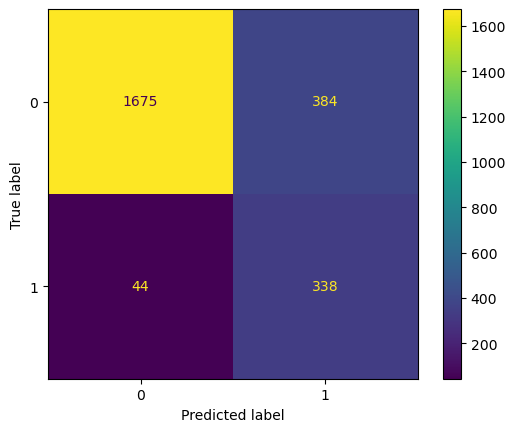

In [70]:
# Cek confussion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [71]:
print("Parameter terbaik:", xgb_randomcv.best_params_)

Parameter terbaik: {'algo__scale_pos_weight': 10, 'algo__reg_lambda': 1, 'algo__reg_alpha': 0, 'algo__n_estimators': 200, 'algo__max_depth': 3, 'algo__learning_rate': 0.05, 'algo__gamma': 0}


Berdasarkan hasil evaluasi, model menunjukkan performa yang sangat baik dalam recall kelas positif dengan recall sebesar 0.93 pada data train dan 0.88 pada data test. Selain itu, berdasarkan hasil evaluasi yang ditunjukkan oleh confusion matrix. Model menunjukkan performa yang sangat baik dalam mendeteksi kelas positif. Tercatat sebanyak 338 pengunjung yang diprediksi membeli dan memang membeli (True Positives) berhasil dikenali dengan benar oleh model, sementara hanya 44 pengunjung diprediksi tidak membeli dan ternyata membeli (False Negatives).

Ini berarti model mampu menangkap sebagian besar kasus pembelian. Hal ini sangat sesuai dengan fokus utama proyek yang menekankan pentingnya recall. Sehingga model ini **goodvit**

# ix. Model Saving

In [72]:
with open('model_terbaik.pkl', 'wb' ) as file:
    pickle.dump(xgb_randomcv_best, file)

# x. Model Inference

Model Inference dapat diakses dinisi -> [Klik](P1M2_arvin_wibowo_inf.ipynb)

# xi. Pengambilan Kesimpulan

Proyek ini bertujuan untuk membangun model machine learning yang mampu memprediksi kemungkinan seorang pengunjung melakukan pembelian, dengan fokus utama pada metric recall untuk memaksimalkan deteksi terhadap pengunjung yang benar-benar membeli. Setelah melalui proses eksplorasi data, feature engineering, dan pengujian beberapa algoritma seperti KNN, SVM, Decision Tree, Random Forest, dan XGBoost, diperoleh model terbaik yang mampu memberikan performa recall tinggi pada kelas positif yaitu XGBoost.

Model XGBoost berhasil mencapai recall sebesar 0.88 pada data test, yang menunjukkan kemampuannya dalam mengenali sebagian besar pengunjung yang benar-benar melakukan pembelian. Model ini juga dioptimalkan menggunakan RandomizedSearchCV, dan diperoleh parameter terbaik sebagai berikut:

- scale_pos_weight: 10
- reg_lambda: 1
- reg_alpha: 0
- n_estimators: 200
- max_depth: 3
- learning_rate: 0.05
- gamma: 0
 
Hasil ini sejalan dengan tujuan awal proyek, yaitu memprioritaskan kemampuan model dalam mengidentifikasi calon pembeli, sehingga model ini berpotensi untuk digunakan sebagai alat bantu dalam strategi pemasaran berbasis data di e-commerce lojualguebeli.com. Meskipun memiliki recall yang tinggi, model ini memiliki kelemahan yaitu memiliki nilai precision yang rendah, khususnya pada kelas positif. Nilai precision pada data test hanya sebesar 0.47.

Selain itu rekomendasi pengembangan selanjutnya yaitu, menciptakan fitur baru yang lebih memiliki tingkat signifikansi yang tinggi (>0.6)

